Importing libraries

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

Loading Datasets

In [64]:
df_expansion= pd.read_csv("../staging/data_set/cleaned_expansion.csv")
df_feedback = pd.read_csv("../staging/data_set/cleaned_customer_feedback.csv")

Formatting Date

In [65]:
df_feedback["score_date"] = pd.to_datetime(df_feedback["score_date"], errors="coerce")
df_feedback["year_week"] = df_feedback["score_date"].dt.to_period("W").astype(str)
df_expansion["score_date"] = pd.to_datetime(df_expansion["score_date"], errors="coerce")
df_expansion["year_week"] = df_expansion["score_date"].dt.to_period("W").astype(str)



Merge product and feedback data

In [66]:

df_merged = pd.merge(df_expansion, df_feedback, on=["id", "year_week"], how="inner")

Calcualting Churn based on nps score and csat score

In [67]:
# NPS score 
nps_churn = df_merged.groupby("nps_score")["product_churn"].sum().reset_index()

#CSAT score
csat_churn = df_merged.groupby("csat_score")["product_churn"].sum().reset_index()

Plotting for nps_score

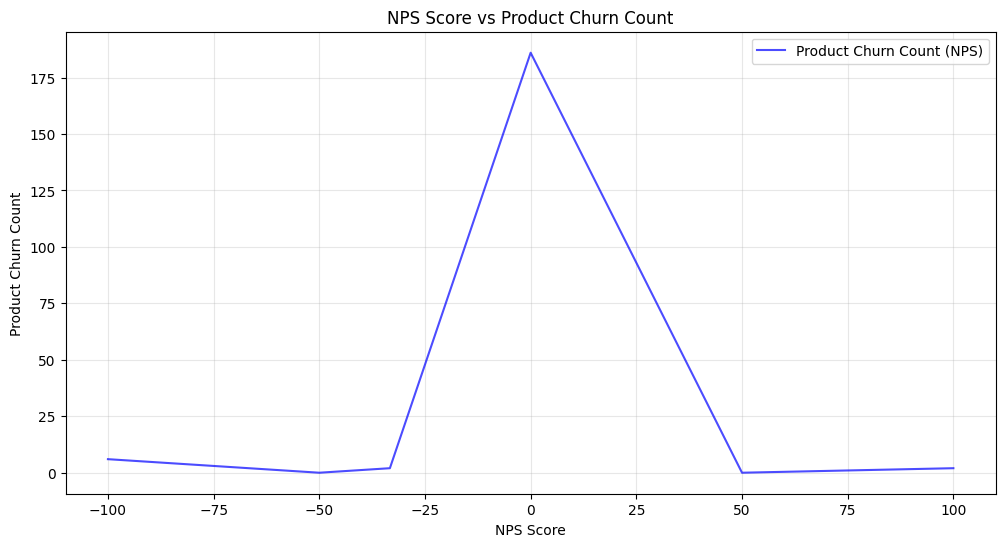

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(nps_churn["nps_score"], nps_churn["product_churn"], color="blue", alpha=0.7, label="Product Churn Count (NPS)")
plt.title("NPS Score vs Product Churn Count")
plt.xlabel("NPS Score")
plt.ylabel("Product Churn Count")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


Plotting for csat_score 

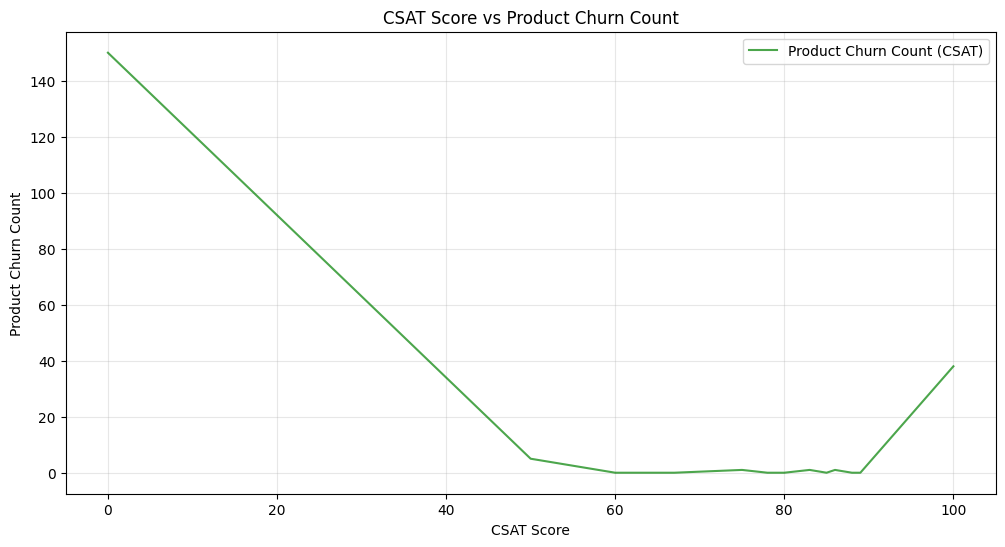

In [ ]:
# Plot CSAT Score vs Product Churn Count
plt.figure(figsize=(12, 6))
plt.plot(csat_churn["csat_score"], csat_churn["product_churn"], color="green", alpha=0.7, label="Product Churn Count (CSAT)")
plt.title("CSAT Score vs Product Churn Count")
plt.xlabel("CSAT Score")
plt.ylabel("Product Churn Count")
plt.grid(alpha=0.3)
plt.legend()
plt.show()